In [1]:
import os
import cv2
import time
import glob
import json
import pandas as pd
import io
import os.path
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import io
from PIL import Image
import re
import os
import time
import pickle
from bs4 import BeautifulSoup
import urllib.request as req
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

In [2]:
from apiclient.http import MediaFileUpload, MediaIoBaseDownload
from genericpath import exists
import numpy as np
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.oauth2 import service_account
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError as HTTPError
from oauth2client.service_account import ServiceAccountCredentials
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.http import MediaFileUpload

In [125]:
umaban = lists[0]
umaban

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [132]:
import glob

MIME_TYPE = 'application/vnd.google-apps.document'
APPLICATION_NAME = 'ipa-google-drive-api-client'
SCOPES = ['https://www.googleapis.com/auth/drive.file']

In [ ]:
options = Options() 
drive_service = google()
# options.headless = True
options.add_argument('--headless')                 # headlessモードを使用する
options.add_argument('--disable-gpu')              # headlessモードで暫定的に必要なフラグ(そのうち不要になる)
options.add_argument('--disable-extensions')       # すべての拡張機能を無効にする。ユーザースクリプトも無効にする
options.add_argument('--proxy-server="direct://"') # Proxy経由ではなく直接接続する
options.add_argument('--proxy-bypass-list=*')      # すべてのホスト名
options.add_argument('--start-maximized')      
driver = Chrome(executable_path="/chromedriver.exe", options=options)

driver.get("https://simple.keiba-lv-st.jp/?track=kouchi")

output_path = "/output.png"
output_text = "output.txt"

In [137]:

# 画質変更ボタンクリック
elem = driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[1]/div[1]/div[2]/button')
elem.click()
# 2000p選択
elem = driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[1]/div[1]/div[2]/ul/li[6]/a')
elem.click()
# # 拡大画面クリック
elem = driver.find_element(By.XPATH,'//*[@id="player-controls-player_1"]/img[2]')
elem.click()

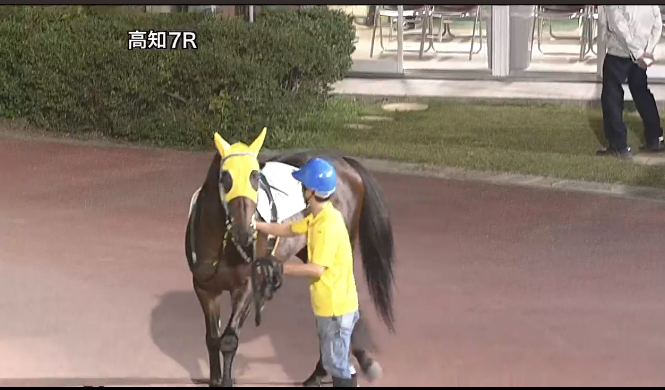

In [138]:
img_png = driver.get_screenshot_as_png()
img_io = io.BytesIO(img_png)
img = Image.open(img_io)
img = img.crop((55, 100, 720, 490))
# (left, upper, right, lower)
# img = img.crop((175, 370, 233, 420))
img

In [139]:
numnum = 0
endNum = 0
while (endNum < 51):
    img_png = driver.get_screenshot_as_png()

    img_io = io.BytesIO(img_png)
    imgP = Image.open(img_io)
    img = imgP.crop((55, 100, 720, 490))
    savephoto = imgP.crop((175, 370, 233, 420))
    test = img.crop((55, 230, 320, 490))
    test.save(output_path)
    importPhoto(output_path, drive_service)
    with open(output_text, encoding="utf-8") as f:
        try:
            num = f.read().splitlines()[1:][1]
            num = re.sub( r'\D+', '', num)
            for i in umaban:
                if str(i) == num:
                    savepath = "" + str(i)
                    # フォルダがなかったら作成
                    if(True != (os.path.isdir(savepath))):
                        os.mkdir(savepath)
                    files = glob.glob(savepath + '/*')
                    if(len(files) < 5):
                        savephoto.save(savepath + "/Num_{}.png".format(str(numnum)))
                        numnum += 1
                        endNum += 1
                        print("実行回数⇒　" + str(endNum))
                    break
        except IndexError:
            continue
            


実行回数⇒　1
実行回数⇒　2
実行回数⇒　3
実行回数⇒　4
実行回数⇒　5
実行回数⇒　6
実行回数⇒　7
実行回数⇒　8
実行回数⇒　9
実行回数⇒　10
実行回数⇒　11
実行回数⇒　12
実行回数⇒　13
実行回数⇒　14
実行回数⇒　15
実行回数⇒　16
実行回数⇒　17
実行回数⇒　18
実行回数⇒　19
実行回数⇒　20
実行回数⇒　21
実行回数⇒　22
実行回数⇒　23
実行回数⇒　24
実行回数⇒　25


KeyboardInterrupt: 

In [42]:
len(glob.glob(""))

4

In [32]:
with open(output_text, encoding="utf-8") as f:
    num = f.read().splitlines()[1:][1]
    re.sub( r'\D+', '', num)

'14'

In [12]:
fileName = ""
movieImg = ""
output_path = ""
output_text = ""
videoCapture = cv2.VideoCapture(fileName)
totalFrames = videoCapture.get(cv2.CAP_PROP_FRAME_COUNT)
success,image = videoCapture.read()
videoCapture.set(cv2.CAP_PROP_POS_FRAMES, 9000)
ret, image = videoCapture.read()
plt.imsave(movieImg,image)

#保存した画像をグレー化してサイズ加工
imgHorse = Image.open(movieImg).convert('L')

# 使いたい画像サイズ
#img = imgHorse.crop((210, 555, 330, 610)) 

# googleORCでわかる大きさにしてメモ帳に書き出し
img = imgHorse.crop((210, 555, 330, 610)) 
# (left, upper, right, lower)

img.save(output_path)
drive_service = google()
importPhoto(output_path, drive_service)

KeyboardInterrupt: 

In [5]:
def google():
    # googleと連携する
    files = glob.glob('')
    try:
        jsonf = files[0]
    except Exception as e:
        print('Error: Get Google Drive API Credential')
        raise e

    sa_creds = service_account.Credentials.from_service_account_file(jsonf)
    scoped_creds = sa_creds.with_scopes(SCOPES)
    drive_service = build('drive', 'v3', credentials=scoped_creds)

    return drive_service

In [133]:
def importPhoto(path, drive_service):
    input_file = path

    # ローカルファイルの定義
    media_body = MediaFileUpload(input_file, mimetype=MIME_TYPE, resumable=True)

    body = {
        'name': input_file,
        'mimeType': MIME_TYPE
    }

    # 　creat関数でファイルアップロード実行
    # 同時にOCR読み取りも行う
    output = drive_service.files().create(
        body=body,
        media_body=media_body,
        # ここで読み込み先言語の指定を行う
        ocrLanguage="ja",
        ).execute()
    outputPhoto(output)

    
def outputPhoto(output):
    request = drive_service.files().export_media(
        fileId=output['id'],
        mimeType = "text/plain"
    )

    #  出力用テキストファイル名
    output_path = ''

    fh = io.FileIO(output_path, "wb")
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()

    # Google Drive上のファイル削除
    drive_service.files().delete(fileId=output['id']).execute()

    # # テキストの取得
    # with open(output_path) as f:
    #     mylist = f.read().splitlines()[1:]
    #     print(mylist)

In [ ]:
fileName = ""
movieImg = ""
output_path = ""
output_text = ""

umaban = lists[0]

videoCapture = cv2.VideoCapture(fileName)
totalFrames = videoCapture.get(cv2.CAP_PROP_FRAME_COUNT)
success,image = videoCapture.read()
drive_service = google()

frameIndex = 0
numnum = 0

while(frameIndex < totalFrames):
        if(frameIndex >= 0 & frameIndex < totalFrames):
                videoCapture = cv2.VideoCapture(fileName)
                totalFrames = videoCapture.get(cv2.CAP_PROP_FRAME_COUNT)
                success,image = videoCapture.read()
                videoCapture.set(cv2.CAP_PROP_POS_FRAMES, frameIndex)
                ret, image = videoCapture.read()
                plt.imsave(movieImg,image)

                #保存した画像をグレー化してサイズ加工
                imgHorse = Image.open(movieImg).convert('L') 
                img = imgHorse.crop((190, 540, 360, 640)) # (left, upper, right, lower)
                img.save(output_path)
                importPhoto(output_path, drive_service)
                    # # テキストの取得
                with open(output_text, encoding="utf-8") as f:
                    try:
                        num = f.read().splitlines()[1:][1]
                        for i in umaban:
                            if str(i) == num:
                                savepath = "" + str(i)
                                # フォルダがなかったら作成
                                if(True != (os.path.isdir(savepath))):
                                    os.mkdir(savepath)
                                files = glob.glob(savepath)
                                if(len(files) < 6):
                                    print("馬番：" + str(i))
                                    img.save(savepath + "/Num_{}.png".format(str(numnum)))
                                    numnum += 1
                                    break
                                else:
                                    break

                        frameIndex += 60
                    except IndexError:
                        frameIndex += 60
                    except TimeoutError:
                        drive_service = google()
                        
                                

In [119]:
import time

# 当日レースの騎手名を取得する
# 随時urlは変更

lists = []
time.sleep(1)

html = 'https://nar.netkeiba.com/race/shutuba.html?race_id=202254111207'

data = pd.read_html(html)[0]
hourseNumber = []
table = []

for j in range(11):
    table.append(data.columns[j][0])

table.append('登録')
table.append('メモ')

data.columns = table

for j in data['馬番']:
    hourseNumber.append(j)

lists.append(hourseNumber)


In [43]:
for i in range(1,15):
    input_dir = "".format(str(i))
    output_dir = "".format(str(i))
    image_list = list(pathlib.Path(input_dir).glob("*.png"))

    for i in range(len(image_list)):
        # 画像一枚を読み込み
        imgHorse = Image.open(image_list[i].as_posix())
        # (280, 800, 550, 950)にリサイズ
        img = imgHorse.crop((280, 800, 550, 950))
        # 保存先
        output_path = output_dir + image_list[i].name
        # 画像保存 
        img.save(output_path)

In [140]:
# コピーと入ってるやつをrenameする関数
import random
import os
from random import randrange
for i in range(1,12):
    input_dir = "".format(str(i))
    output_dir = "".format(str(i))
    image_list = list(pathlib.Path(input_dir).glob("*.png"))


    for i in range(len(image_list)):
        if "コピー" in image_list[i].as_posix():
            # num = randrange(1000)
            a = image_list[i].as_posix().split('/')
            num = randrange(1000)
            name = a[0] + '/' + a[1] + '/' +a[2] + '/' +a[3] + '/' +a[4] + '/' +a[5] + '/' + str(num) + '.png'
            os.rename(image_list[i].as_posix(), name)

In [4]:
# コピーと入ってるやつをrenameする関数
import random
import os
from random import randrange
for i in range(1,13):
    input_dir = "".format(str(i))
    output_dir = "".format(str(i))
    image_list = list(pathlib.Path(input_dir).glob("*.jpg"))


    for i in range(len(image_list)):
        a = image_list[i].as_posix().split('/')
        num = randrange(10000)
        name = a[0] + '/' + a[1] + '/' +a[2] + '/' +a[3] + '/' +a[4] + '/' +a[5] + '/' + str(num) + '_ver2.png'
        os.rename(image_list[i].as_posix(), name)


In [146]:
count = 0
for i in range(1,13):
    input_dir = "".format(str(i))
    output_dir = "".format(str(i))
    image_list = list(pathlib.Path(input_dir).glob("*.png"))


    for i in range(len(image_list)):
        # 画像一枚を読み込み
        img = cv2.imread(image_list[i].as_posix())
        
        # 保存先
        count = count + 1
        path = output_dir + str(count) + '2.jpg'

        count = count + 1
        black(img, path)

        count = count + 1
        path = output_dir + str(count) + '2.jpg'

        affine(img, path)

        # count = count + 1
        # path = output_dir + str(count) + '2.jpg'

        # perspective(img, path)

        count = count + 1
        path = output_dir + str(count) + '2.jpg'

        gamma_correction(img, 0.1, path)

        count = count + 1
        path = output_dir + str(count) + '2.jpg'

        gamma_correction(img, 1.9, path)

In [142]:
def black(img, path):
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,img_2chika = cv2.threshold(img_grayscale,200,255,cv2.THRESH_BINARY)
    cv2.imwrite(path, img_2chika)

In [143]:
def affine(img, path):
    rows,cols,ch = img.shape
    pts1 = np.float32([[0,50],[50,0],[10,50]])
    pts2 = np.float32([[0,50],[40,10],[10,50]])
    M = cv2.getAffineTransform(pts1,pts2)
    img_afin = cv2.warpAffine(img,M,(cols,rows))
    cv2.imwrite(path, img_afin)

In [144]:
def perspective(img, path):
    rows,cols,ch = img.shape
    pts1 = np.float32([[0,0],[100,0],[0,100],[100,100]])
    pts2 = np.float32([[20,0],[80,0],[0,100],[100,100]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    img_syaei = cv2.warpPerspective(img,M,(100,100))
    cv2.imwrite(path, img_syaei)

In [145]:
def gamma_correction(image, gamma, path):#輝度変化用の関数
    lookup_table = np.zeros((256, 1), dtype = 'uint8')  
    for loop in range(256):    
        lookup_table[loop][0] = 255 * pow(float(loop)/255, 1.0/gamma) 
    image_gamma = cv2.LUT(image, lookup_table) 

    cv2.imwrite(path, image_gamma)